Our Goal
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

In [2]:
import pandas as pd

data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('mort_acc')

### Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [164]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [22]:
df.describe().transpose()

#Data analysis

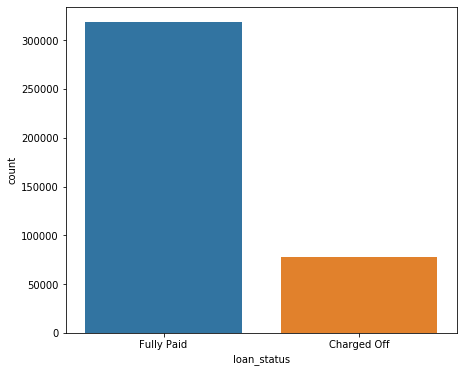

In [20]:
#countplot for the predicted label 
plt.figure(figsize=(7,6))
sns.countplot(x='loan_status', data=df)

Create a histogram of the loan_amnt column.

(array([2.7420e+03, 7.4500e+03, 1.0489e+04, 1.2791e+04, 2.0755e+04,
        2.2033e+04, 1.6495e+04, 2.1415e+04, 1.4714e+04, 3.7229e+04,
        1.2498e+04, 2.7261e+04, 9.8230e+03, 1.0588e+04, 2.6409e+04,
        1.4103e+04, 7.0870e+03, 1.3769e+04, 5.8370e+03, 2.2546e+04,
        8.0130e+03, 4.7010e+03, 3.7470e+03, 1.0780e+04, 1.1336e+04,
        2.2570e+03, 2.1860e+03, 6.9460e+03, 1.4940e+03, 8.0720e+03,
        8.9700e+02, 1.9290e+03, 1.2930e+03, 1.0300e+03, 1.5054e+04,
        5.0000e+01, 1.2000e+01, 8.0000e+00, 6.0000e+00, 1.8500e+02]),
 array([  500. ,  1487.5,  2475. ,  3462.5,  4450. ,  5437.5,  6425. ,
         7412.5,  8400. ,  9387.5, 10375. , 11362.5, 12350. , 13337.5,
        14325. , 15312.5, 16300. , 17287.5, 18275. , 19262.5, 20250. ,
        21237.5, 22225. , 23212.5, 24200. , 25187.5, 26175. , 27162.5,
        28150. , 29137.5, 30125. , 31112.5, 32100. , 33087.5, 34075. ,
        35062.5, 36050. , 37037.5, 38025. , 39012.5, 40000. ]),
 <a list of 40 Patch objects>)

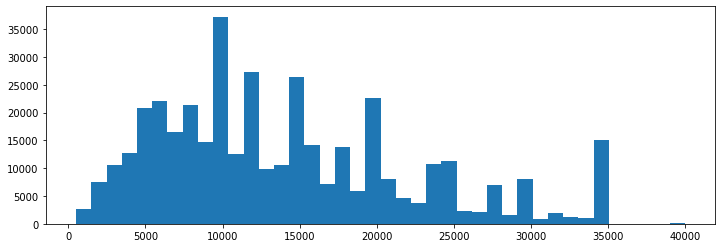

In [28]:
plt.figure(figsize=(12,4))
plt.hist(df['loan_amnt'],bins=40)


Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.

In [29]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.

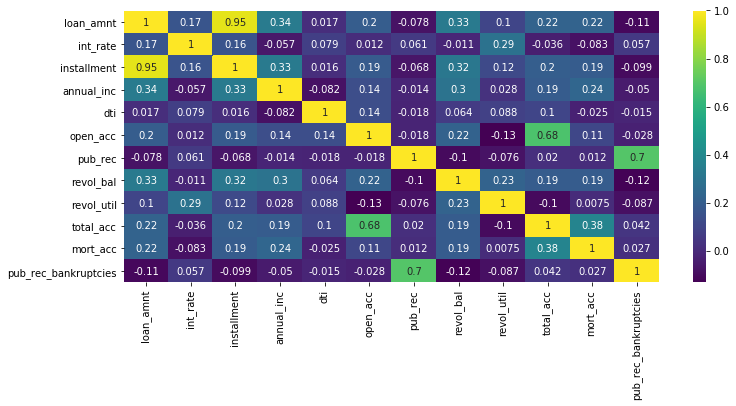

In [34]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [35]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [37]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


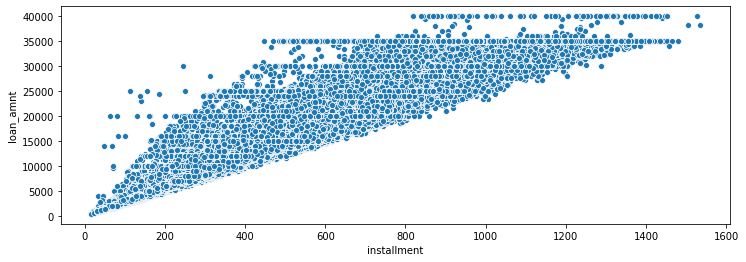

In [42]:
plt.figure(figsize=(12,4))
#plt.scatter(x='installment', y='loan_amnt', data=df)
sns.scatterplot(x='installment', y='loan_amnt', data=df)

Create a boxplot showing the relationship between the loan_status and the Loan Amount.

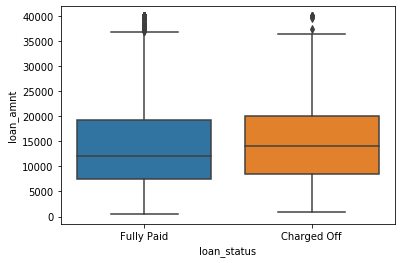

In [48]:
#plt.figure(figsize=(10,3))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

 Calculate the summary statistics for the loan amount, grouped by the loan_status.

In [49]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?

In [50]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [52]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [53]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

Create a countplot per grade. Set the hue to the loan_status label.

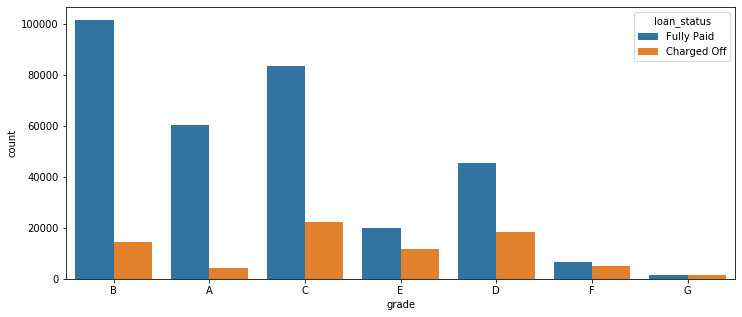

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(x='grade', hue='loan_status', data=df)

Display a count plot per subgrade

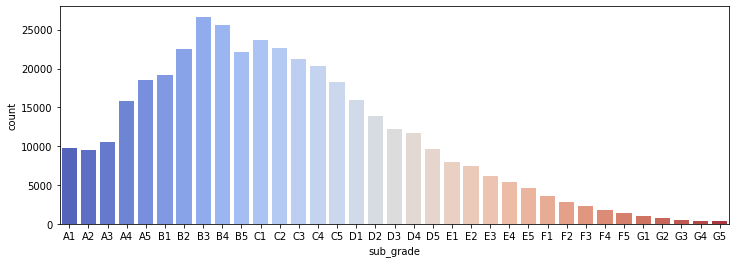

In [65]:
plt.figure(figsize=(12,4))
ordered_subgrade= sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=ordered_subgrade,palette='coolwarm')

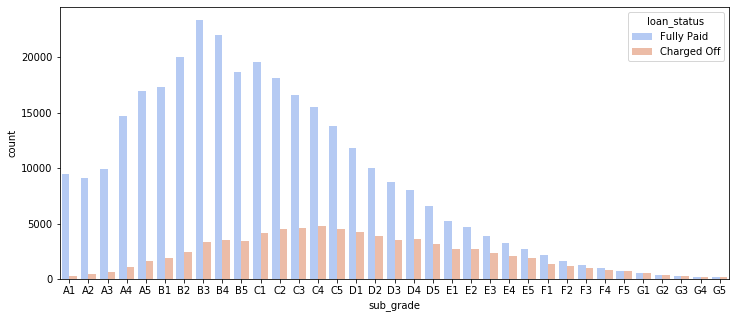

In [66]:
plt.figure(figsize=(12,5))

ordered_subgrade= sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=ordered_subgrade,palette='coolwarm',hue='loan_status')

It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

In [68]:
F_and_G= df[(df['grade']=='G') | (df['grade']=='F')]

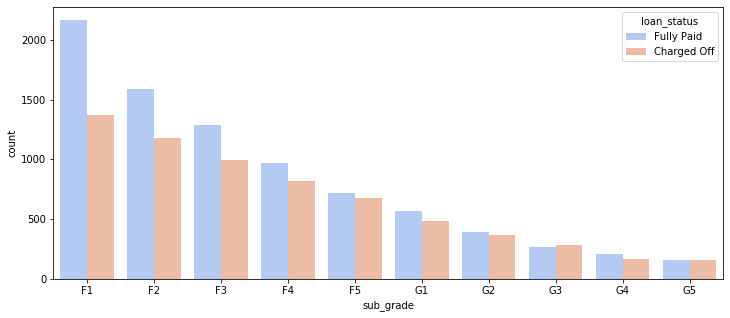

In [70]:
plt.figure(figsize=(12,5))

ordered_subgrade= sorted(F_and_G['sub_grade'].unique())
sns.countplot(x='sub_grade', data=F_and_G, order=ordered_subgrade,palette='coolwarm',hue='loan_status')

Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [223]:
df['loan_repaid'] =df['loan_status'].map({'Fully Paid':1,'Charged Off':0 })

In [79]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [80]:
#df['loan_status']

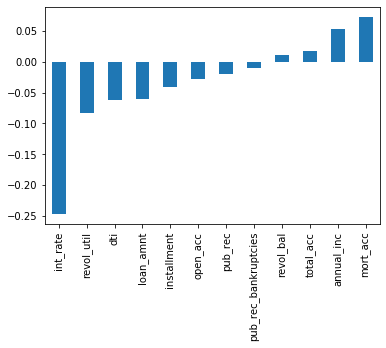

In [85]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

### Data Preprocessing
Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [91]:
#df.head(10)

In [87]:
len(df)

396030

 Create a Series that displays the total count of missing values per column.

In [92]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [221]:
#df['loan_repaid']

Convert this Series to be in term of percentage of the total DataFrame

In [97]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Let's examine emp_title and emp_length to see whether it will be okay to drop them.
Print out their feature information using the feat_info() function from the top of this notebook.

In [98]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [101]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


How many unique employment job titles are there?

In [106]:
df['emp_title'].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
                                     ... 
Lead Systems Support Specialist         1
Training & Operations Coordinator       1
Underwriter Coordinator                 1
Letterer                                1
Akers & Arney                           1
Name: emp_title, Length: 173105, dtype: int64

In [104]:
df['emp_title'].nunique()

173105

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [110]:
df = df.drop('emp_title',axis=1)

crate a count plot of the emp_length feature column, sor the order if the values

In [122]:

sorted_years = sorted(df['emp_length'].dropna().unique())
sorted_years 


['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [127]:
sorted_emp_years=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

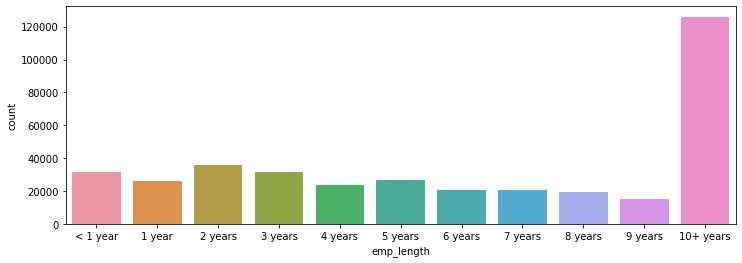

In [128]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=sorted_emp_years)

In [129]:
#plot out the countplot with a hue separating fully paid vs charged off

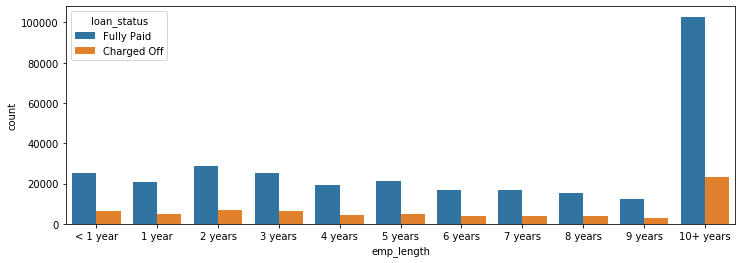

In [130]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data=df, order=sorted_emp_years, hue='loan_status')

In [131]:
#drop the emp_length 
df =df.drop('emp_length',axis=1)

In [132]:
#revisit the df to see what feature columns still have missing data
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [133]:
#title and purpose columns are the same, so we drop the title column
df = df.drop('title', axis=1)

## Filling the missing data

In [134]:
#fing out what the mort_acc frature is
feat_info('mort_acc')

Number of mortgage accounts.


In [135]:
#create a valur_counts of the mort_acc column
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [136]:
#find out the most correlations columns to the mort_acc feature
df.corr()['mort_acc'].sort_values().

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [147]:
#total_acc is highly correlated with mort_acc, so we use fillna() to fill it by the mean value of that column
total_acc_avg= df.groupby('total_acc').mean()['mort_acc']


In [148]:
total_acc_avg


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [149]:
#fill in the missing values with the total_acc_avg using the apply method
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [150]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [169]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [168]:
df = df.dropna()

In [153]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

##Categorical data

In [170]:
#list all non numerical data
df.select_dtypes(['object']).columns


Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [173]:
#convert term feature into 0 or 1 based on 36 or 60
df['term'] =df['term'].apply(lambda term:int(term[:3]))


In [172]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396024    36
396025    60
396026    36
396027    36
396028    60
Name: term, Length: 335868, dtype: int64

In [174]:
#drop the grade feature
df = df.drop('grade', axis=1)

In [175]:
#covert the subgrade into dummy variables, then concatenate these new columns to the original datafrme
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df= pd.concat([df.drop('sub_grade', axis=1),dummies],axis=1)


In [176]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [178]:
#df['verification_status']

In [182]:
#conver verification_status , application_type, initial_list_status, purpose to dummy variables and concatenate to the original df
dummies= pd.get_dummies(df[['verification_status','initial_list_status','purpose'] ],drop_first=True)
df=pd.concat([df.drop(['verification_status','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [183]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'issue_d', 'loan_status',
       'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dt

In [ ]:
dummies= pd.get_dummies(df['initial_list_status'],drop_first=True)
df=pd.concat([df.drop('initial_list_status'),axis=True,dummies],axis=1)

In [ ]:
dummies= pd.get_dummies(df['purpose'],drop_first=True)
df=pd.concat([df.drop('purpose'),axis=True,dummies],axis=1)

In [186]:
#review the value_counts for the home_ownership
df['home_ownership'].value_counts()

MORTGAGE    170832
RENT        133932
OWN          31045
OTHER           59
Name: home_ownership, dtype: int64

In [185]:
#replace NONE,ANY woith OTHER and create dummy variables 
df['home_ownership']= df['home_ownership'].replace(['NONE','ANY'],'OTHER')


In [201]:
#df['home_ownership']
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396024    05113
396025    30723
396026    05113
396027    70466
396028    29597
Name: zip_code, Length: 335868, dtype: object

In [190]:
dummies= pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [196]:
#feature the address column to get the zip code and make dummies of it
#df['address']
df['zip_code']=df['address'].apply(lambda address:address[-5:])

In [198]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396024    05113
396025    30723
396026    05113
396027    70466
396028    29597
Name: zip_code, Length: 335868, dtype: object

In [202]:
dummies= pd.get_dummies(df['zip_code'],drop_first=True)
df=pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [203]:
df= df.drop('address',axis=1)

In [205]:
df =df.drop('issue_d',axis=1)

In [206]:
df.head(1)

,loan_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,loan_status,title,dti,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,Marketing,10+ years,117000.0,Fully Paid,Vacation,26.24,...,1,0,0,1,0,0,0,0,0,0


In [212]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396024    1991
396025    2004
396026    2006
396027    1997
396028    1990
Name: earliest_cr_year, Length: 335868, dtype: object

In [210]:
#grap the last four chars in the string, convert to an int, and store in a variable
df['earliest_cr_year'] =df['earliest_cr_line'].apply(lambda date:date[-4:])

In [213]:
df =df.drop('earliest_cr_line',axis=1)

### Trian and test

In [214]:
from sklearn.model_selection import train_test_split


In [219]:
#drop the loan_status since its a duplicate of the loan_repaid
df =df.drop('loan_status',axis=1)
df.columns



Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'annual_inc', 'title', 'dti', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '30723', '48052', '70466

In [224]:
#set X and y variables to the features and lables
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [226]:
#split the data into train and test with 20% of the test size and random of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [227]:
#use MinMaxScaler to normalize the feature data X_train and X_test
from sklearn.preprocessing import MinMaxScaler


In [228]:
scaler= MinMaxScaler()

In [ ]:
X_trian= scaler.fit_transform(X_trian)
X_test= scaler.transform(X_test)

## creating the model


In [230]:
import tensorflow as tf
from tessorflow.keras.models import Sequential
from tensorflow.kerad.layers import Dense,Dropout

In [ ]:
#build a sequential model that goes 78--> 39 --->19 -->1 output layer
X_train.shape# to show us how many nuorns we could include

model = Sequential()
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')



In [231]:
#fit the model to the training data for 25 epochs and also add in the validation data and add in batch_size of 256

In [233]:
model.fit(x=X_train,y=y_train, epochs=25,batch_size=256,calidation_data=(X_test,y_test))

In [235]:
#save the model
from tensorflow.ketas.models import load_model
model.save('mymodel.h5')



## evaluate the model


In [237]:
#plot the validation liss versus the trining loss

losses =pd.DataFrame(model.history.history)
losses
losses[['loss','val_loss']].plot()


In [ ]:
#Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
#Given a new customer detials, will give a loan or not

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

In [ ]:
model.predict_classes(new_customer.values.reshape(1,78))

In [ ]:
df.iloc[random_ind]['loan_repaid']